Прежде чем проверять задания:
- **Перезапустите ядро** (**restart the kernel**) (В меню, выбрать Ядро (Kernel) $\rightarrow$ Перезапустить (Restart)
- Затем **Выполнить все ячейки**  **run all cells** (В меню, выбрать Ячейка (Cell) $\rightarrow$ Запустить все (Run All).

Убедитесь, что заполнены все ячейки с комментарием "НАЧАЛО ВАШЕГО РЕШЕНИЯ".

После ячеек с заданием следуют ячейки с проверкой с помощью assert.

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Цель занятия
На этом занятии мы на практике разберемся, как устроен градиентный спуск на примере реализации функционала ошибки Хьюбера с одним оптимизируемым параметром.

Также мы визуализируем концепцию регуляризации, основанной на добавлении слагаемого к функции потерь модели.

Также мы с нуля реализуем алгоритм линейной регрессии с помощью numpy.

## Часть 1. Градиентный спуск на примере реализации функционала ошибки Хьюбера с одним оптимизируемым параметром

Задачи:
- реализовать функцию потерь Хубера
- реализовать функцию вычисления производной функции потерь Хубера
- визуализировать поведение алгоритма градиентного спуска при различных параметрах

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

Реализуйте в ячейке ниже следующий алгоритм для вычисления значений функции Хьюбера:

Если x по модулю меньше или равен delta, то вернуть $\frac{1}{2} \cdot x^2$

Иначе вернуть $delta \cdot ( abs(x) - 0.5 \cdot delta )$

In [23]:
def huber(x, delta=1.0):
# НАЧАЛО ВАШЕГО РЕШЕНИЯ

    if abs(x) <= delta:
        return 0.5 * x**2
    else:
        return delta * (abs(x) - 0.5 * delta)
  
# raise NotImplementedError()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [24]:
assert np.isclose(huber(0), 0)
assert np.isclose(huber(1), 0.5)
assert np.isclose(huber(-1), 0.5)
assert np.isclose(huber(2), 1.5)
assert np.isclose(huber(-2), 1.5)
assert np.isclose(huber(10, delta=5), 37.5)
assert np.isclose(huber(-2, delta=5), 2.0)
assert np.isclose(huber(0.5), 0.125)
assert np.isclose(huber(-0.5), 0.125)
assert np.isclose(huber(-10, delta=5), 37.5)
assert np.isclose(huber(2, delta=5), 2.0)

Реализуйте в ячейке ниже следующий алгоритм для вычисления значений производной функции Хьюбера по параметру x:

вернуть x, если |x| <= delta

Иначе:
$\begin{cases}
delta, & \text{если } x > 0 \\
-delta, & \text{если } x < 0 \\
\end{cases}$

In [25]:
def huber_derivative(x, delta):
# НАЧАЛО ВАШЕГО РЕШЕНИЯ

    if abs(x) <= delta:
        return x
    elif x > 0:
        return delta
    else:
        return -delta

# raise NotImplementedError()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [26]:
assert huber_derivative(0, 1) == 0
assert huber_derivative(1, 1) == 1
assert huber_derivative(-1, 1) == -1
assert huber_derivative(2, 1) == 1
assert huber_derivative(-2, 1) == -1
assert huber_derivative(0.5, 1) == 0.5
assert huber_derivative(-0.5, 1) == -0.5
assert huber_derivative(2, 5) == 2
assert huber_derivative(-2, 5) == -2
assert huber_derivative(4, 2) == 2

In [27]:
def gradient_descent(ax,
        x0 = 5,
        delta = 1.0,
        alpha = 0.1,
        eps = 0.01,
        n_iter = 100
        ):
    """
    :param x0: Стартовая точка для параметра x, выбирать из диапазона [-5, 5] 
    :param delta: Параметр delta для функции Хубера, 0.0 по умолчанию
    :param alpha: Скорость обучения, 0.1 по умолчанию
    :param eps: Окрестность оптимума, при попадании в которую прекращается выполнение алгоритма, 0.01 по умолчанию
    :param n_iter: Количество итераций до остановки, 100 по умолчанию
    :param ax: Объект осей (axis), представляет графический контейнер для отображения данных на графике
    
    :return: 
    """
    y_true = 0.0
    y_pred0 = huber(x0, delta=1.0)
    
    converged = False
    
    # Запускаем алгоритм градиентного спуска
    for i in range(n_iter):
        # Вычисляем производную функции потерь Хубера
        grad = huber_derivative(x0, delta)
        x1 = x0 - alpha*grad  # Вычисляем новое приближение
        y_pred1 = huber(x1, delta=1.0)
        # Рисуем отрезок
        ax.plot([x0, x1], [y_pred0, y_pred1], 'ro-')
        if abs(x1 - x0) < eps:  # Проверяем условие выхода
            print(f"Алгоритм сошелся за {i+1} шагов")
            converged = True
            break
        x0 = x1
        y_pred0 = y_pred1
        
    if not converged:
        print(f"Алгоритм не сошелся за {i+1} шагов")

Алгоритм сошелся за 6 шагов


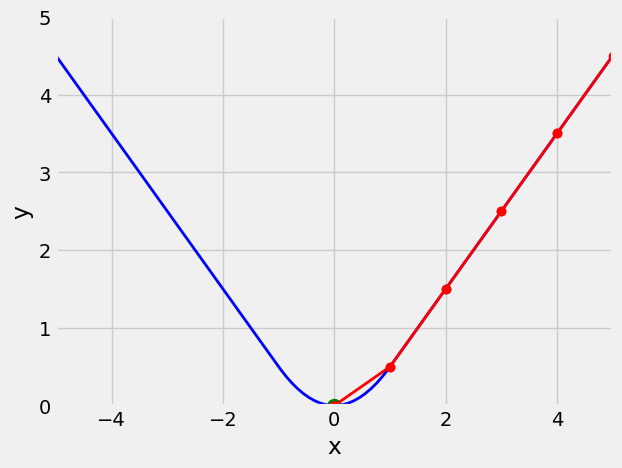

In [28]:
fig, ax = plt.subplots()

# # # Рисуем точку минимума
ax.plot(0, 0, 'go', markersize=10)

# Задаем интервал поиска минимума
x = np.linspace(-5, 5, 100)

# Рисуем график функции Хубера
y = np.vectorize(huber)(x)
ax.plot(x, y, 'b')

gradient_descent(ax,
                x0 = 5,
                alpha = 1,
                eps = 0.01
                )
# # Настраиваем оси и выводим график на экран
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(0, 5)
plt.show()

In [29]:
"""
!!! Ответьте на следующие вопросы:
Вопрос 1: За какое количество шагов сойдется алгоритм, если передать в gradient_descent в ячейке выше
такие параметры: (ax, x0 = 5, alpha = 1, eps = 0.01)
ОТВЕТ ЗАПИСАТЬ В ПЕРЕМЕННУЮ answer_1_num_steps
ПРИМЕР:
answer_1_num_steps = 1
"""
# НАЧАЛО ВАШЕГО РЕШЕНИЯ

answer_1_num_steps = 6

# raise NotImplementedError()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

"""
Вопрос 2: Сойдется ли алгоритм, если передать в gradient_descent
такие параметры: (ax, x0 = -5, alpha = 3, eps = 0.01)
Варианты ответов: "Да" или "Нет"
ОТВЕТ ЗАПИСАТЬ В ПЕРЕМЕННУЮ answer_2_converged_or_not
ПРИМЕР:
answer_2_converged_or_not = "Да"
"""
# НАЧАЛО ВАШЕГО РЕШЕНИЯ

answer_2_converged_or_not = "Нет"

# raise NotImplementedError()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

## Часть 2. Визуализация концепции регуляризации, основанной на добавлении слагаемого к функции потерь модели

Реальные данные распределены вдоль линии синусоиды. В данной задаче визуализируеся обобщающая способность модели и регуляризация модели.

Задачи:
- визуализировать регуляризацию при различных параметрах

In [30]:
# Задаем точки для визуализации

dots = [(-1.9933147173759478, -0.9390893949143323),
         (-1.8783910144218139, -0.8667300263876551),
         (-1.6698257757272743, -1.0880645654104326),
         (-1.4484912367044975, -1.109346732624161),
         (-1.4612605370327347, -0.9092943608151123),
         (-1.2, -1),
         (-0.2524334392929545, -0.16867494177735687),
         (-0.060893934369397745, -0.2154957096475598),
         (0.4, 0.2),
         (0.4158266112181212, 0.46553364119175555),
         (1.0330094604162485, 0.7805097159549389)]

# создание списков координат в формате, требуемом для matplotlib
x_coords = []
y_coords = []
for el in dots:
    x_coords.append(el[0])
    y_coords.append(el[1])

In [31]:
"""
Создайте список degs для итерирования по значениям степени, в нем должно быть 3 элемента: 2, 5, 8
"""
# НАЧАЛО ВАШЕГО РЕШЕНИЯ

degs = [2, 5, 8]

# raise NotImplementedError()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

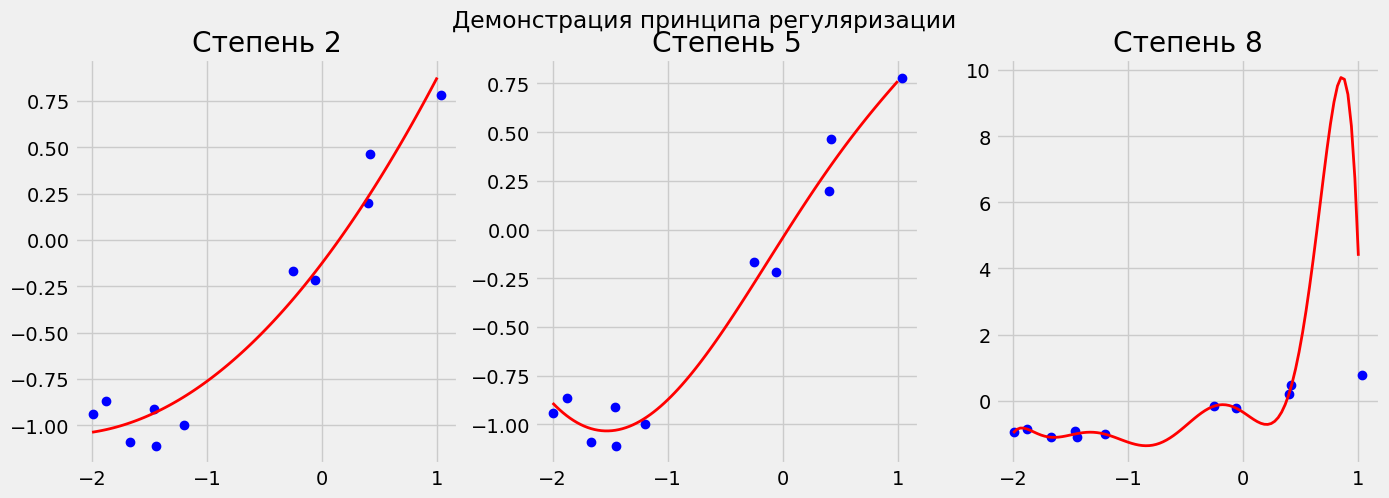

In [32]:
degs_dict = {}

for deg in degs:
    # Находим коэффициенты полинома deg степени, который проходит через наши точки
    coefficients = np.polyfit(x_coords, y_coords, deg=deg)

    # # Создаем новый массив x, через которые мы хотим построить линию
    new_x_coords = np.linspace(-2, 1, 100)

    # Находим соответствующие y-координаты для новых значений x с помощью polyval
    new_y_coords = np.polyval(coefficients, new_x_coords)
    
    degs_dict[deg] = {"new_x_coords": new_x_coords,
                      "new_y_coords": new_y_coords}

# Создание графиков
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(3):
    axs[i].plot(x_coords, y_coords, 'bo')
    axs[i].plot(degs_dict[degs[i]]["new_x_coords"], degs_dict[degs[i]]["new_y_coords"], 'r')
    axs[i].set_title(f'Степень {degs[i]}')

# Настройка общего заголовка
fig.suptitle('Демонстрация принципа регуляризации')

# Отображение графиков
plt.show()

## Часть 3. Алгоритм линейной регрессии 

Линейная регрессия - это метод машинного обучения, который используется для прогнозирования числовых значений на основе входных данных. В этом методе используется линейная комбинация входных переменных, чтобы получить выходное значение.

Градиентный спуск - это метод оптимизации, который используется для нахождения минимума функции путем итеративного изменения параметров функции в направлении наискорейшего убывания градиента.

В данном примере мы рассмотрим линейную регрессию с нуля с градиентным спуском с использованием библиотеки numpy.

Задачи:
- реализовать функцию вычисления градиента и сохранения истории обучения

In [33]:
"""
Наша цель в построении модели линейной регрессии - найти оптимальные значения параметров модели (w и b), 
чтобы минимизировать среднеквадратичную ошибку (MSE) нашей модели.

Для этого мы определяем функцию потерь, которая будет вычислять MSE:
# Внутри функции compute_cost произведите следующие шаги:
    1. вычислите длину y (можно воспользоваться len()) и сохратине эту длину в переменную n
    2. вычислите произведение матриц X и theta и сохраните получившуюся матрицу в переменную predictions
    3. сохраните в переменную cost вычисления 1/2 * 1/n * сумма квадратов разностей 
    прогнозов от истинных ответов (можно воспользоваться np.sum и np.square)
    ###
    ПОЯСНЕНИЕ К ФОРМУЛЕ cost:
    Коэффициент 1/2 перед квадратичной функцией потерь часто используется для удобства и облегчения 
    математических вычислений.
    При использовании квадратичной функции потерь вида L = (1/2) * (y - f(x))^2, 
    где y представляет собой истинное значение, а f(x) - предсказанное значение модели для входных 
    данных x, коэффициент 1/2 добавляется, чтобы упростить дальнейшие математические выкладки.
    Почему используется коэффициент 1/2? При нахождении минимума функции потерь по параметрам 
    модели необходимо взять производную. Коэффициент 1/2 упрощает дифференцирование и устраняет 
    множитель 2, который возникает при дифференцировании квадрата.
    Таким образом, добавление коэффициента 1/2 перед квадратичной функцией потерь не 
    влияет на ее форму и свойства, но упрощает математические вычисления.
    ###
    4. Верните cost через return

"""


def compute_cost(X, y, theta):
# НАЧАЛО ВАШЕГО РЕШЕНИЯ

    # 1. вычислим длину "y"
    n = len(y)

    # 2. вычислите произведение матриц X и theta
    predictions = np.dot(X, theta)
    
    # 3. Bычисления 1/2 * 1/n * сумма квадратов разностей прогнозов от истинных ответов
    square = []
    for i in range(n):
        square.append(np.square(y[i] - predictions[i]))
    cost = 1/2 * 1/n * np.sum(square)
    
    # 4. Верните cost через return
    return cost
   

# raise NotImplementedError()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [34]:
# тестовая выборка
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[7], [9], [11]])
theta = np.array([[1], [1]])

# тест 1
assert np.allclose(compute_cost(X, y, theta), 3.333333333333333)

# тест 2
theta = np.array([[0], [0]])
assert np.allclose(compute_cost(X, y, theta), 41.83333333333333)

# тест 3
theta = np.array([[1], [2]])
assert np.allclose(compute_cost(X, y, theta), 7.333333333333333)

# тест 4
theta = np.array([[-1], [-1]])
assert np.allclose(compute_cost(X, y, theta), 140)

# тест 5
X = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7], [8]])
theta = np.array([[1], [1], [1]])
assert np.allclose(compute_cost(X, y, theta), 12.5)

# тест 6
X = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7], [8]])
theta = np.array([[0], [0], [0]])
assert np.allclose(compute_cost(X, y, theta), 28.25)

# тест 7
X = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7], [8]])
theta = np.array([[1], [2], [3]])
assert np.allclose(compute_cost(X, y, theta), 156.25)

# тест 8
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[7], [9], [11]])
theta = np.array([[2], [2]])
assert np.allclose(compute_cost(X, y, theta), 24.5)

# тест 9
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[7], [9], [11]])
theta = np.array([[-2], [-2]])
assert np.allclose(compute_cost(X, y, theta), 297.8333333333333)

# тест 10
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[7], [9], [11]])
theta = np.array([[-1], [0]])
assert np.allclose(compute_cost(X, y, theta), 77.33333333333333)

In [35]:
# Теперь мы можем использовать градиентный спуск для нахождения оптимальных значений параметров модели. 
# Для этого мы будем итеративно обновлять значения параметров, используя градиент функции потерь. 
# Реализуем это через функцию gradient_descent:


def gradient_descent(X, y, theta, learning_rate, iterations):
    """    
    1.1 вычислите длину y (можно воспользоваться len()) и сохратине эту длину в переменную n
    1.2 создайте матрицу cost_history с помощью np.zeros, передав в np.zeros iterations в качестве параметра
    1.3 создайте матрицу theta_history с помощью np.zeros, передав в np.zeros (iterations, theta.shape[0]) 
    в качестве параметра. ВНИМАНИЕ: в np.zeros() передается ОДИН параметр - кортеж.
    Пример: np.zeros((element1, element2))
    """

    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    
    # 1.1 вычислитм длину "y"
    n = len(y)
    
    # 1.2 создадим матрицу "cost_history"
    cost_history = np.zeros(iterations)
    
    # 1.3 создадим матрицу "theta_history"
    theta_history = np.zeros((iterations, theta.shape[0]))
    
    # raise NotImplementedError()
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    # Итерируемся по количеству итераций
    for i in range(iterations):
        """        
        # 2.1 вычислите произведение матриц X и theta, сохранив результат в переменную predictions
        # 2.2 вычислите разность матриц predictions - y , сохранив результат в переменную errors 
        # 2.3 вычислите градиент как 1/n * (транспонированная X dot errors) в переменную gradient 
        # 2.4 обновите веса (theta): theta = theta - скорость обучения * градиент
        # 2.5 сохраните cost_history[i] с помощью функции compute_cost (cost_history[i] = )
        # 2.6 сохраните theta_history[i] с помощью theta.T (theta_history[i] = )
        """

        # НАЧАЛО ВАШЕГО РЕШЕНИЯ
        
        # 2.1 вычислим произведение матриц X и theta
        predictions = np.dot(X, theta)
        
        # 2.2 вычислим разность матриц predictions - y
        errors = predictions - y
        
        # 2.3 вычислите градиент
        gradient = 1/n * (np.dot(np.transpose(X), errors))
        # print(gradient)
        
        # 2.4 обновим веса (theta)
        theta = theta - learning_rate * gradient
        
        # 2.5 сохраним cost_history[i]
        cost_history[i] = compute_cost(X, y, theta)
        
        # 2.6 сохраним theta_history[i]
        theta_history[i] = theta.T
        
        # raise NotImplementedError()
        # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return theta, cost_history, theta_history


In [36]:
# Тестовая выборка
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[7], [9], [11]])
theta = np.array([[1], [1]])
learning_rate = 0.01
iterations = 1000

# Тест 1
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
assert np.allclose(theta, np.array([[-2.46344196], [3.99753184]]))

# Тест 2
theta = np.array([[0], [0]])
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
assert np.allclose(theta, np.array([[-2.51713436], [4.03991894]]))

# Тест 3
theta = np.array([[1], [2]])
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
assert np.allclose(theta, np.array([[-2.66475138], [4.15645417]]))

# Тест 4
theta = np.array([[-1], [-1]])
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
assert np.allclose(theta, np.array([[-2.57082676], [4.08230603]]))

# Тест 5
X = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7], [8]])
theta = np.array([[1], [1], [1]])
learning_rate = 0.001
iterations = 10000
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
assert np.allclose(theta, np.array([[-2.86481901], [0.13770713], [3.14023328]]))

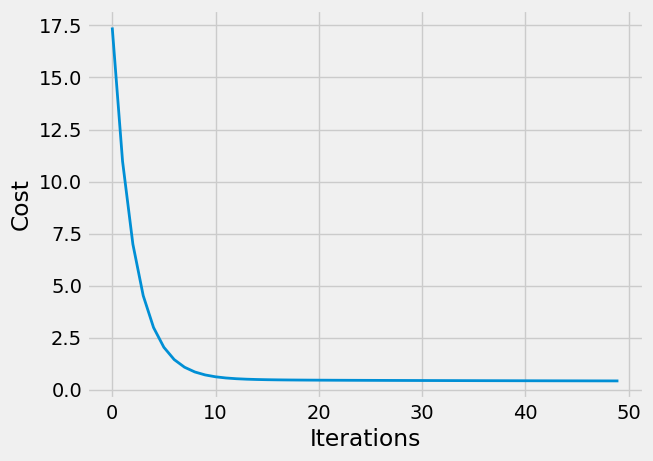

In [37]:
# Для примера, мы создадим простой набор данных с помощью функции numpy
# Здесь мы создаем 100 случайных значений для входных данных X и вычисляем выходные данные y, 
# используя линейную комбинацию с небольшим шумом.

X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1)

theta = np.random.randn(2,1) # случайная инициализация весов
X_b = np.c_[np.ones((len(X),1)), X] # добавление фиктивного признака, равного 1, для всех обучающих примеров

theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate=0.1, iterations=50)

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Мы видим, что обучение прошло успешно, значение функционала ошибки снижается во время обучения.